# Veroni diagrams

We quickly explore the [veroni diagram](https://en.wikipedia.org/wiki/Voronoi_diagram) computation given by `scipy`.  

The `scipy` package computes the vertices of the veroni diagram and indicates how these are joined up.  For the "points at infinity" it does not give an indication of the direction, but this can be infured by making sure that the line heads *away from* the centre of the original collection of points.  This is implemented below in code when drawing the dotted lines.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial

array([[ 0.10887427,  0.69984304],
       [ 0.15997059,  0.39749924],
       [ 0.23385996,  0.46498491],
       [ 0.41943984,  0.51375069],
       [ 0.50596975,  0.15606433],
       [ 0.64122897,  0.59204386],
       [ 0.6974799 ,  0.71951164],
       [ 0.71718107,  0.99166487],
       [ 0.8119103 ,  0.43436999],
       [ 0.90581632,  0.4176991 ]])

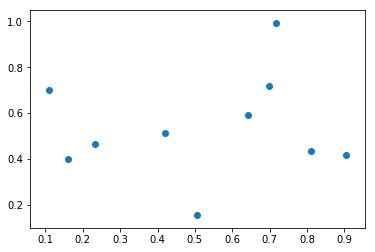

In [2]:
points = np.random.random(size=(10, 2))
order = np.lexsort((points[:,1], points[:,0]))
points = points[order]
plt.scatter(points[:,0], points[:,1])
points

In [3]:
voroni = scipy.spatial.Voronoi(points)

In [4]:
def perp_direction(points, a, b):
    """Return (x,y) a vector which is pendicular to the line from point
    `a` to point `b` in `points`, orientated correctly, and of unit length.
    """
    x = points[b,0] - points[a,0]
    y = points[b,1] - points[a,1]
    n = np.sqrt(x*x + y*y)
    x, y = y/n, -x/n
    centre = np.mean(points, axis=0)
    midpoint = (points[a] + points[b]) / 2
    
    if np.dot(centre-midpoint, np.array([x,y])) <= 0:
        return x,y
    else:
        return -x,-y

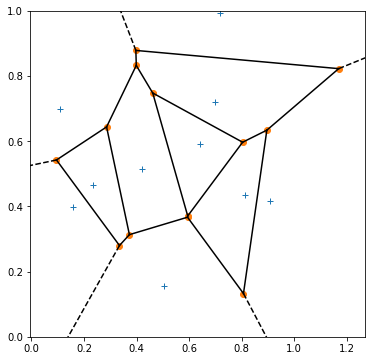

In [5]:
def plot_voroni(voroni, ax):
    ax.scatter(voroni.points[:,0], voroni.points[:,1], linewidth=1, marker="+")
    for ((a,b),(aa,bb)) in zip(voroni.ridge_vertices, voroni.ridge_points):
        if a == -1:
            sx, sy = voroni.vertices[b,0], voroni.vertices[b,1]
            x, y = perp_direction(voroni.points, aa, bb) 
            x = [sx, sx + x*2]
            y = [sy, sy + y*2]
            ls = "--"
        else:
            x = [voroni.vertices[a,0], voroni.vertices[b,0]]
            y = [voroni.vertices[a,1], voroni.vertices[b,1]]
            ls = "-"
        ax.plot(x, y, color="black", linestyle=ls)
    ax.scatter(voroni.vertices[:,0], voroni.vertices[:,1])

    mi, ma = np.min(voroni.vertices, axis=0), np.max(voroni.vertices, axis=0)
    mi -= np.array([.1,.1])
    ma += np.array([.1,.1])
    ax.set(xlim=[min(0,mi[0]), max(1,ma[0])], ylim=[min(0,mi[1]), max(1,ma[1])])

fig, ax = plt.subplots(figsize=(6,6))
plot_voroni(voroni, ax)

# Application to minimal enclosing circle

One of the vertices of the veroni diagram will be the centre of the circle of minimal radius which contains all the points.

Our main application, at present, is to computing the [smallest circle](https://en.wikipedia.org/wiki/Smallest-circle_problem) enclosing points in the plane.

This is current *wrong*.  We need to compute the "further point Voroni diagram" and also do some pre-computation.  See http://www.dma.fi.upm.es/personal/mabellanas/tfcs/fvd/algorithm.html

In [6]:
radii = []
for pt in voroni.vertices:
    d = points - pt
    distances = np.sqrt(d[:,0]**2 + d[:,1]**2)
    radius = np.max(distances)
    radii.append(radius)

index = radii.index(min(radii))

centre, radius = voroni.vertices[index], radii[index]

[(-0.2, 1.2), (-0.2, 1.2)]

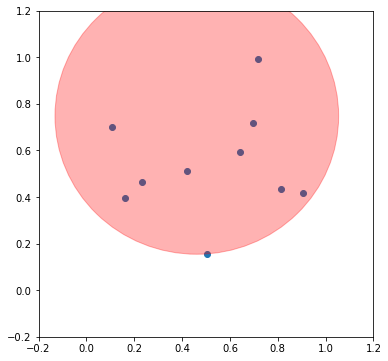

In [7]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(points[:,0], points[:,1])
c = plt.Circle(centre, radius, alpha=0.3, color="red")
ax.add_artist(c)
ax.set(xlim=[-.2,1.2], ylim=[-.2,1.2])

# Veroni diagram of a subset of points

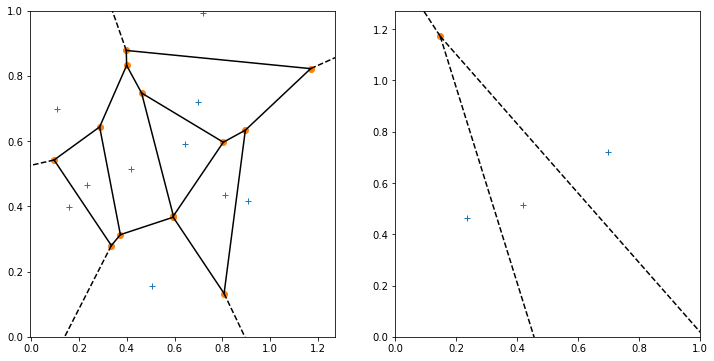

In [11]:
mask = np.random.random(size=points.shape[0]) <= 0.5
pts2 = points[mask]
voroni2 = scipy.spatial.Voronoi(pts2)

fig, ax = plt.subplots(ncols=2, figsize=(12,6))
plot_voroni(voroni, ax[0])
plot_voroni(voroni2, ax[1])

In [13]:
voroni2.points

array([[ 0.23385996,  0.46498491],
       [ 0.41943984,  0.51375069],
       [ 0.6974799 ,  0.71951164]])

In [14]:
pts2

array([[ 0.23385996,  0.46498491],
       [ 0.41943984,  0.51375069],
       [ 0.6974799 ,  0.71951164]])